<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°08

**Objetivo**: Aplicar técnicas de **machine learning no supervisado** para explorar, procesar y analizar conjuntos de datos con variables numéricas y categóricas.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.


## Clustering


<img src="https://www.svgrepo.com/show/253022/car.svg" width = "300" align="center"/>



El conjunto de datos **`vehiculos_procesado_con_grupos.csv`** recopila información sobre diversas características relevantes de distintos vehículos. El propósito de este ejercicio es **clasificar los vehículos en diferentes categorías**, utilizando como base las variables descritas en la tabla de atributos.

El análisis presenta un desafío adicional debido a la **naturaleza mixta de los datos**: se incluyen tanto variables **numéricas** (ej. dimensiones, consumo, emisiones) como **categóricas** (ej. tipo de tracción, tipo de combustible), lo que requiere aplicar técnicas de preprocesamiento adecuadas antes de entrenar los modelos.

Como primer paso, procederemos a **cargar y explorar el conjunto de datos**, con el fin de familiarizarnos con su estructura y las características que servirán como base para la posterior clasificación.


[texto del vínculo](https://)

**Descripción de los Datos:**

| **Nombre de la Columna**   | **Descripción**                                                                                                                                   |
|----------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------|
| **year**                   | El año en que el vehículo fue fabricado.                                                                                                          |
| **desplazamiento**          | La capacidad volumétrica del motor en litros. Indica la cantidad de aire y combustible que puede desplazar el motor durante una revolución.       |
| **cilindros**               | El número de cilindros que tiene el motor. Los cilindros son las cámaras donde ocurre la combustión interna en los motores de los vehículos.       |
| **co2**                     | Emisiones de dióxido de carbono del vehículo, medido en gramos por kilómetro. Es una medida de las emisiones de gases de efecto invernadero.       |
| **clase_tipo**              | La clase o tipo de vehículo, como vehículos especiales, deportivos, etc.                                                                         |
| **traccion_tipo**           | Tipo de tracción del vehículo, ya sea tracción en dos ruedas, en cuatro ruedas o en todas las ruedas.                                             |
| **transmision_tipo**        | Tipo de transmisión del vehículo, como automática, manual, entre otros.                                                                          |
| **combustible_tipo**        | Tipo de combustible que utiliza el vehículo, como gasolina, diésel, eléctrico, híbrido, etc.                                                     |
| **tamano_motor_tipo**       | Clasificación del tamaño del motor (por ejemplo, pequeño, mediano o grande), que generalmente se basa en la capacidad de desplazamiento.           |
| **consumo_tipo**            | Clasificación del nivel de consumo de combustible del vehículo, indicando si es alto, bajo, o muy alto.                                           |
| **co2_tipo**                | Clasificación de las emisiones de CO2 del vehículo, indicando si es alto, bajo, o muy alto.                                                       |
| **consumo_litros_milla**    | El consumo de combustible del vehículo, medido en litros por milla. Indica la eficiencia del vehículo en términos de consumo de combustible.        |



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline

sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/vehiculos_procesado_con_grupos.csv", sep=",")\
       .drop(
            ["fabricante",
             "modelo",
             "transmision",
             "traccion",
             "clase",
             "combustible",
             "consumo"],

          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


In [3]:
# 1. Normalizar datos numéricos
numeric_data = df.select_dtypes(include='number')
numeric_data = numeric_data.fillna(numeric_data.mean())
# Normalizar los datos utilizando MinMaxScaler
scaler = MinMaxScaler()
normalized_numeric_data = pd.DataFrame(scaler.fit_transform(numeric_data), columns=numeric_data.columns)

normalized_numeric_data.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,0.000000,0.243590,0.142857,0.398014,0.331027
1,0.000000,0.461538,0.285714,0.527672,0.475113
2,0.029412,0.243590,0.142857,0.424351,0.360294
3,0.029412,0.461538,0.285714,0.527672,0.475113
4,0.088235,0.410256,0.285714,0.424351,0.360294


In [4]:
# 2. Codificar variables categóricas
categorical_data = df.select_dtypes(include='object')
encoded_categorical_data = pd.get_dummies(categorical_data)

In [5]:
# 3. Combinar ambos datasets
df_procesado = pd.concat([normalized_numeric_data, encoded_categorical_data], axis=1)
df_procesado.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.000000,0.243590,0.142857,0.398014,0.331027,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
1,0.000000,0.461538,0.285714,0.527672,0.475113,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0.029412,0.243590,0.142857,0.424351,0.360294,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
3,0.029412,0.461538,0.285714,0.527672,0.475113,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,0.088235,0.410256,0.285714,0.424351,0.360294,False,False,False,True,False,...,True,False,False,False,False,True,False,False,False,False




**Descripción de los Datos:**

| **Nombre de la Columna**   | **Descripción**                                                                                                                                   |
|----------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------|
| **year**                   | El año en que el vehículo fue fabricado.                                                                                                          |
| **desplazamiento**          | La capacidad volumétrica del motor en litros. Indica la cantidad de aire y combustible que puede desplazar el motor durante una revolución.       |
| **cilindros**               | El número de cilindros que tiene el motor. Los cilindros son las cámaras donde ocurre la combustión interna en los motores de los vehículos.       |
| **co2**                     | Emisiones de dióxido de carbono del vehículo, medido en gramos por kilómetro. Es una medida de las emisiones de gases de efecto invernadero.       |
| **clase_tipo**              | La clase o tipo de vehículo, como vehículos especiales, deportivos, etc.                                                                         |
| **traccion_tipo**           | Tipo de tracción del vehículo, ya sea tracción en dos ruedas, en cuatro ruedas o en todas las ruedas.                                             |
| **transmision_tipo**        | Tipo de transmisión del vehículo, como automática, manual, entre otros.                                                                          |
| **combustible_tipo**        | Tipo de combustible que utiliza el vehículo, como gasolina, diésel, eléctrico, híbrido, etc.                                                     |
| **tamano_motor_tipo**       | Clasificación del tamaño del motor (por ejemplo, pequeño, mediano o grande), que generalmente se basa en la capacidad de desplazamiento.           |
| **consumo_tipo**            | Clasificación del nivel de consumo de combustible del vehículo, indicando si es alto, bajo, o muy alto.                                           |
| **co2_tipo**                | Clasificación de las emisiones de CO2 del vehículo, indicando si es alto, bajo, o muy alto.                                                       |
| **consumo_litros_milla**    | El consumo de combustible del vehículo, medido en litros por milla. Indica la eficiencia del vehículo en términos de consumo de combustible.        |



In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import unicodedata

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline

sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [9]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/vehiculos_procesado_con_grupos.csv", sep=",")\
       .drop(
            ["fabricante",
             "modelo",
             "transmision",
             "traccion",
             "clase",
             "combustible",
             "consumo"],

          axis=1)

df.tail()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
36786,2015,1.0,3.0,244.0,Coches pequeños,dos,Automatica,Premium,muy pequeño,muy bajo,muy bajo,0.105150
36787,2016,0.9,3.0,246.0,Coches pequeños,dos,Automatica,Premium,muy pequeño,muy bajo,muy bajo,0.108155
36788,2016,0.9,3.0,255.0,Coches pequeños,dos,Manual,Premium,muy pequeño,muy bajo,muy bajo,0.111336
36789,2017,0.9,3.0,248.0,Coches pequeños,dos,Automatica,Premium,muy pequeño,muy bajo,muy bajo,0.108155
36790,2017,0.9,3.0,257.0,Coches pequeños,dos,Manual,Premium,muy pequeño,muy bajo,muy bajo,0.111336


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

### 1.- Normalizar datos

- Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.
- Cree un conjunto de datos con las variables categóricas , además, transforme de variables categoricas a numericas ocupando el comando **get_dummies** de pandas ([referencia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

- Junte ambos dataset en uno, llamado **df_procesado**.

In [10]:
#Solución #Datos numericos 

datos_numericos = df.select_dtypes(include=['float64']) 
datos_numericos = datos_numericos.fillna(datos_numericos.mean()) 
scaler = MinMaxScaler() 
#Normalizacion
datos_numericos_normalizados = scaler.fit_transform(datos_numericos)
datos_numericos_normalizados = pd.DataFrame(datos_numericos_normalizados, columns=datos_numericos.columns) 
#Datos categoricos
datos_categoricos = df.select_dtypes(include=['object']) 
datos_categoricos = pd.get_dummies(datos_categoricos) 
#Juntamos los dos conjuntos de datos 
df_procesado=pd.concat([datos_numericos_normalizados,datos_categoricos],axis=1)
new_col = [] 
for col in df_procesado.columns: 
    col = col.lower() 
    col= col.replace(" ", "_") 
    col = unicodedata.normalize('NFKD', col).encode('ascii','ignore').decode('ascii') 
    new_col.append(col) 
df_procesado.columns=new_col 
df_procesado.head()




,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_camionetas,clase_tipo_coche_familiar,clase_tipo_coches_grandes,clase_tipo_coches_medianos,clase_tipo_coches_pequenos,clase_tipo_deportivos,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy_alto,consumo_tipo_muy_bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy_alto,co2_tipo_muy_bajo
0,0.243590,0.142857,0.398014,0.331027,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
1,0.461538,0.285714,0.527672,0.475113,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0.243590,0.142857,0.424351,0.360294,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
3,0.461538,0.285714,0.527672,0.475113,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,0.410256,0.285714,0.424351,0.360294,False,False,False,True,False,False,...,True,False,False,False,False,True,False,False,False,False


### 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de **8 clusters**.
2. Asociar a cada individuo el correspondiente cluster y calcular valor de los centroides de cada cluster.
3. Realizar un resumen de las principales cualidades de cada cluster. Para  esto debe calcular (para cluster) las siguientes medidas de resumen:
    * Valor promedio de las variables numérica
    * Moda para las variables numericas

In [11]:
X = np.array(df_procesado)
kmeans = KMeans(n_clusters=8,n_init=25, random_state=123)
kmeans.fit(X)

centroids = kmeans.cluster_centers_ # centros
clusters = kmeans.labels_ # clusters

In [12]:
# etiquetar los datos con los clusters encontrados
df_procesado["cluster"] = clusters
df_procesado["cluster"] = df_procesado["cluster"].astype('category')
centroids_df_procesado = pd.DataFrame(centroids,
                                      columns=df_procesado.columns[0:-1]
                                      )
centroids_df_procesado["cluster"] = [1,2,3,4,5,6,7,8]
centroids_df_procesado

,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_camionetas,clase_tipo_coche_familiar,clase_tipo_coches_grandes,clase_tipo_coches_medianos,clase_tipo_coches_pequenos,clase_tipo_deportivos,...,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy_alto,consumo_tipo_muy_bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy_alto,co2_tipo_muy_bajo,cluster
0,0.585590,0.430797,0.510289,0.454503,0.259250,0.005599,0.059153,0.059396,0.197420,0.074489,...,2.192690e-15,1.168452e-02,9.571568e-01,-3.941292e-15,1.703992e-03,7.216450e-16,4.868549e-04,9.978092e-01,7.494005e-16,1
1,0.334035,0.258127,0.354211,0.281400,0.178237,0.083791,0.093962,0.135454,0.181466,0.175331,...,3.309655e-02,9.636745e-01,-3.275158e-15,3.228931e-03,1.291572e-03,6.457862e-04,9.980626e-01,-3.774758e-15,2.553513e-15,2
2,0.236153,0.157991,0.257461,0.172659,0.043573,0.068627,0.034314,0.278867,0.349129,0.212418,...,2.178649e-03,-1.221245e-15,5.273559e-16,9.978214e-01,5.551115e-16,4.084967e-02,9.803922e-03,3.608225e-16,9.493464e-01,3
3,0.250916,0.195881,0.304474,0.226879,0.058074,0.096014,0.046021,0.154773,0.451034,0.144364,...,9.820573e-01,5.551115e-17,-1.665335e-15,1.794275e-02,-1.720846e-15,9.939734e-01,5.204766e-03,-2.581269e-15,8.218052e-04,4
4,0.148941,0.142350,0.236470,0.151675,0.002645,0.131723,0.011814,0.092400,0.709751,0.041439,...,3.524958e-15,1.763357e-04,-2.581269e-15,9.998237e-01,-1.137979e-15,7.229765e-03,1.665335e-15,-2.581269e-15,9.927702e-01,5
5,0.562730,0.405562,0.501887,0.442585,0.435441,0.001318,0.003953,0.010211,0.058300,0.271080,...,3.080869e-15,5.599473e-03,9.367589e-01,-3.136380e-15,-3.053113e-16,6.938894e-16,2.886580e-15,1.000000e+00,2.026157e-15,6
6,0.450892,0.327218,0.409961,0.343261,0.304320,0.017109,0.041275,0.048546,0.150984,0.236741,...,4.163336e-15,4.041916e-02,8.554320e-04,-4.246603e-15,9.950813e-01,6.415740e-04,6.415740e-04,3.635586e-03,2.359224e-15,7
7,0.361933,0.299356,0.354076,0.282180,0.001512,0.083900,0.085916,0.189972,0.561854,0.072562,...,2.746284e-02,9.717813e-01,-2.692291e-15,2.519526e-04,2.368355e-02,6.661338e-16,9.763165e-01,-2.942091e-15,2.275957e-15,8


In [13]:
for i in range(1,9):
    print("Media Clusters", i)
    print(df_procesado[df_procesado['cluster']==i-1].drop(list(df_procesado.columns[5:],), axis=1).mean())
    print('')
    print("Moda Clusters", i)
    print(df_procesado[df_procesado['cluster']==i-1].drop(list(df_procesado.columns[5:],), axis=1).mode())
    print("")

Media Clusters 1
desplazamiento           0.585590
cilindros                0.430797
co2                      0.510289
consumo_litros_milla     0.454503
clase_tipo_camionetas    0.259250
dtype: float64

Moda Clusters 1
   desplazamiento  cilindros       co2  consumo_litros_milla  \
0        0.564103   0.428571  0.454199              0.393464   

   clase_tipo_camionetas  
0                  False  

Media Clusters 2
desplazamiento           0.334035
cilindros                0.258127
co2                      0.354211
consumo_litros_milla     0.281400
clase_tipo_camionetas    0.178237
dtype: float64

Moda Clusters 2
   desplazamiento  cilindros       co2  consumo_litros_milla  \
0        0.307692   0.285714  0.374603              0.305011   

   clase_tipo_camionetas  
0                  False  

Media Clusters 3
desplazamiento           0.236153
cilindros                0.157991
co2                      0.257461
consumo_litros_milla     0.172659
clase_tipo_camionetas    0.043573
dtype: 

In [15]:
#Solución

kmeans = KMeans(n_clusters=8, n_init= 25, random_state=123)
kmeans.fit(df_procesado)
centroids = kmeans.cluster_centers_
clusters =kmeans.labels_
df_procesado['cluster']=clusters
df_procesado['cluster']=df_procesado['cluster'].astype('category')
cluster_summaries ={}

for i in range(8):
    cluster_data = df_procesado[clusters ==i]
    numerical_means = cluster_data.select_dtypes(include=['number']).mean()
    categorical_modes = cluster_data.select_dtypes(include=['object','category']).mode()
    cluster_summaries[i] ={
        'numerical_means': numerical_means,
        'categorical_modes': categorical_modes
    }
for cluster, summary in cluster_summaries.items():
    print(f"Cluster {cluster}:")
    print("Promedio de variables numéricas:")
    print(summary['numerical_means'])
    

Cluster 0:
Promedio de variables numéricas:
desplazamiento          0.334035
cilindros               0.258127
co2                     0.354211
consumo_litros_milla    0.281400
dtype: float64
Cluster 1:
Promedio de variables numéricas:
desplazamiento          0.148941
cilindros               0.142350
co2                     0.236470
consumo_litros_milla    0.151675
dtype: float64
Cluster 2:
Promedio de variables numéricas:
desplazamiento          0.250916
cilindros               0.195881
co2                     0.304474
consumo_litros_milla    0.226879
dtype: float64
Cluster 3:
Promedio de variables numéricas:
desplazamiento          0.562730
cilindros               0.405562
co2                     0.501887
consumo_litros_milla    0.442585
dtype: float64
Cluster 4:
Promedio de variables numéricas:
desplazamiento          0.236153
cilindros               0.157991
co2                     0.257461
consumo_litros_milla    0.172659
dtype: float64
Cluster 5:
Promedio de variables numéricas:
d

Por la cantidad de datos, resulta complejo identificar tendencias con solo 8 clusters, pues, son 26 categorias de 36791. 

### 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una vez realizado el gráfico, saque sus propias conclusiones del caso.

In [16]:
Nc = [5,10,20,30,50,75,100,200,300]
kmeans = [KMeans(n_clusters=i, n_init=10) for i in Nc]  # Suppressing the warning here
score = [kmeans[i].fit(df_procesado).inertia_ for i in range(len(kmeans))]

df_Elbow = pd.DataFrame({'Number of Clusters': Nc, 'Score': score})

df_Elbow.head()

,Number of Clusters,Score
0,5,124877.865595
1,10,81995.020764
2,20,65986.098961
3,30,55394.794634
4,50,43480.771420


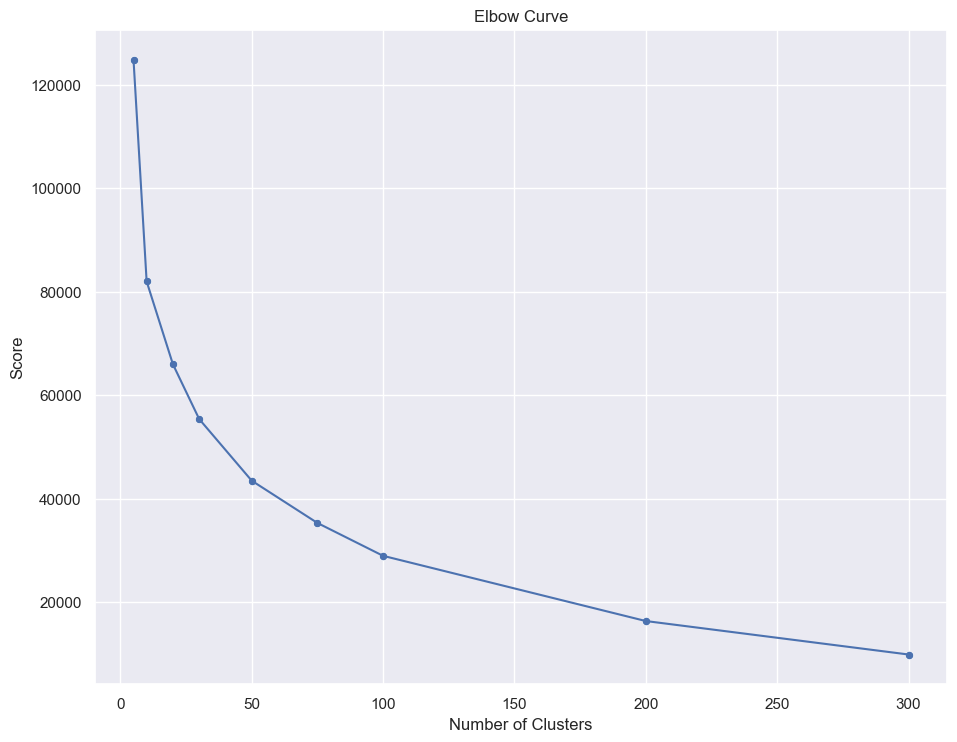

In [17]:
# graficar los datos etiquetados con k-means
fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)
plt.show()

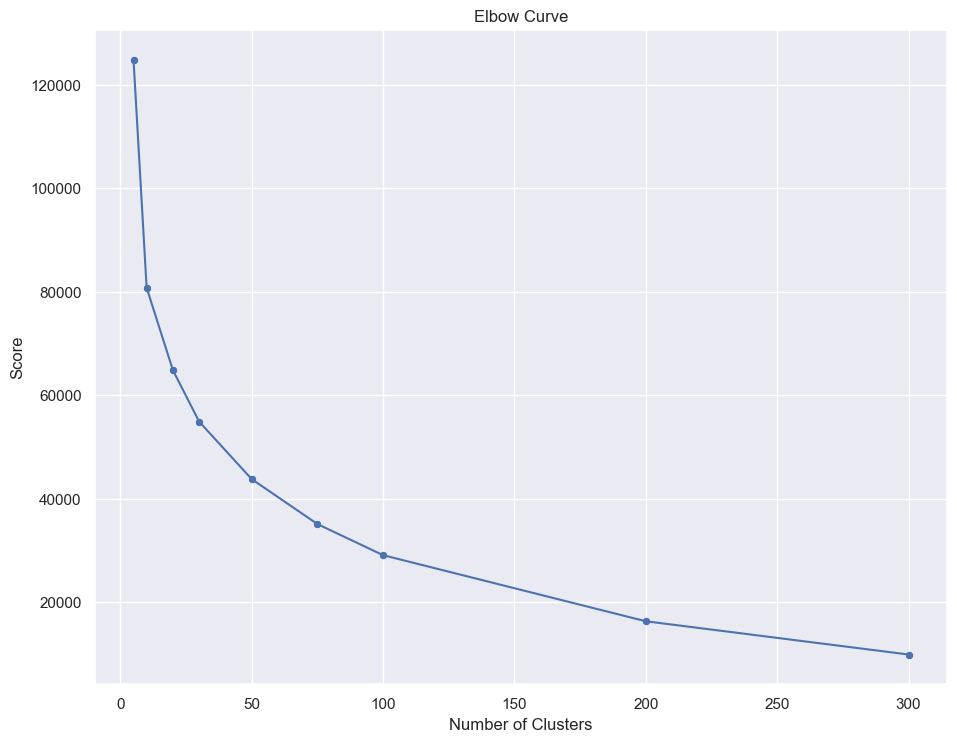

In [18]:
rango_clusters=[5, 10, 20, 30, 50, 75, 100, 200, 300]
kmeans = [KMeans(n_clusters=i, n_init=10) for i in rango_clusters]
score = [kmeans[i].fit(df_procesado).inertia_ for i in range(len(kmeans))]

df_Elbow = pd.DataFrame({'Number of Clusters': rango_clusters, 'Score': score})

df_Elbow.head()

fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)
plt.show()

Al observar el gráfico resultante, se pueden obtener conclusiones sobre el número apropiado de clusters. La regla del codo sugiere elegir el número de clusters donde la reducción en la inercia se estabiliza significativamente. En otras palabras, se busca el punto en el gráfico donde la curva de inercia comienza a aplanarse o forma un codo.

## Respuesta: 
Dado el grafico, si bien 200 clusters es una buena medida, se perderia todo el proposito de hacer clusters, pues, seran demasiados y graficarlos sera poco indicativo. Dicho esto, podriamos escoger clusters cerca de donde se dobla el codo. Esto es, cerca 80 clusters

## Reducción de Dimensionalidad

<img src="https://1000logos.net/wp-content/uploads/2020/11/Wine-Logo-old.png" width = "300" align="center"/>


Para este ejercicio utilizaremos el **Wine Dataset**, un conjunto de datos clásico disponible en la librería **scikit-learn** y en el repositorio de la **UCI Machine Learning**.
Este dataset contiene información de **178 muestras de vino** provenientes de la región italiana de *Piamonte*. Cada vino pertenece a una de **tres variedades de uva** (*clases*), que actúan como etiquetas para el análisis supervisado, pero aquí se usarán solo como referencia en la visualización.

Cada muestra está descrita por **13 variables químicas** obtenidas de un análisis de laboratorio, entre ellas:

* **Alcohol**: porcentaje de alcohol en el vino.
* **Malic acid**: concentración de ácido málico.
* **Ash**: contenido de ceniza.
* **Alcalinity of ash**: alcalinidad de la ceniza.
* **Magnesium**: cantidad de magnesio (mg/L).
* **Total phenols**: concentración total de fenoles.
* **Flavanoids**: tipo de fenoles con propiedades antioxidantes.
* **Nonflavanoid phenols**: fenoles que no son flavonoides.
* **Proanthocyanins**: compuestos relacionados con el color y el sabor.
* **Color intensity**: intensidad del color del vino.
* **Hue**: matiz del color.
* **OD280/OD315 of diluted wines**: relación de absorbancia que mide la calidad del vino.
* **Proline**: concentración de prolina (un aminoácido).

Estas características permiten representar cada vino como un punto en un espacio de **13 dimensiones**.

El objetivo del análisis con este dataset es **reducir la dimensionalidad** para visualizar y explorar patrones en los datos. Para ello aplicaremos:

* **PCA (Principal Component Analysis):** identificar las combinaciones lineales de variables que explican la mayor varianza en el conjunto.
* **t-SNE (t-distributed Stochastic Neighbor Embedding):** mapear las muestras a 2D o 3D, preservando relaciones de vecindad y estructuras no lineales.

La comparación entre ambas técnicas permitirá observar cómo las tres clases de vinos se diferencian en el espacio reducido y discutir la utilidad de la reducción de dimensionalidad en datos con mayor número de variables que en el caso del dataset Iris.



## Reducción de Dimensionalidad

<img src="https://1000logos.net/wp-content/uploads/2020/11/Wine-Logo-old.png" width = "300" align="center"/>


Para este ejercicio utilizaremos el **Wine Dataset**, un conjunto de datos clásico disponible en la librería **scikit-learn** y en el repositorio de la **UCI Machine Learning**.
Este dataset contiene información de **178 muestras de vino** provenientes de la región italiana de *Piamonte*. Cada vino pertenece a una de **tres variedades de uva** (*clases*), que actúan como etiquetas para el análisis supervisado, pero aquí se usarán solo como referencia en la visualización.

Cada muestra está descrita por **13 variables químicas** obtenidas de un análisis de laboratorio, entre ellas:

* **Alcohol**: porcentaje de alcohol en el vino.
* **Malic acid**: concentración de ácido málico.
* **Ash**: contenido de ceniza.
* **Alcalinity of ash**: alcalinidad de la ceniza.
* **Magnesium**: cantidad de magnesio (mg/L).
* **Total phenols**: concentración total de fenoles.
* **Flavanoids**: tipo de fenoles con propiedades antioxidantes.
* **Nonflavanoid phenols**: fenoles que no son flavonoides.
* **Proanthocyanins**: compuestos relacionados con el color y el sabor.
* **Color intensity**: intensidad del color del vino.
* **Hue**: matiz del color.
* **OD280/OD315 of diluted wines**: relación de absorbancia que mide la calidad del vino.
* **Proline**: concentración de prolina (un aminoácido).

Estas características permiten representar cada vino como un punto en un espacio de **13 dimensiones**.

El objetivo del análisis con este dataset es **reducir la dimensionalidad** para visualizar y explorar patrones en los datos. Para ello aplicaremos:

* **PCA (Principal Component Analysis):** identificar las combinaciones lineales de variables que explican la mayor varianza en el conjunto.
* **t-SNE (t-distributed Stochastic Neighbor Embedding):** mapear las muestras a 2D o 3D, preservando relaciones de vecindad y estructuras no lineales.

La comparación entre ambas técnicas permitirá observar cómo las tres clases de vinos se diferencian en el espacio reducido y discutir la utilidad de la reducción de dimensionalidad en datos con mayor número de variables que en el caso del dataset *Wine*.



In [19]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [20]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [21]:
# cargar dataset
dataset = load_wine()

# nombres de las variables
features = dataset.feature_names
target = 'wine_class'

# construir DataFrame
wine = pd.DataFrame(dataset.data, columns=features)
wine[target] = dataset.target

# ver primeras filas
wine.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0




### 1. **Análisis detallado con PCA**

* Calcular la **varianza explicada** por cada componente principal y representar el gráfico de varianza acumulada, identificando cuántos componentes son necesarios para capturar al menos el **90–95% de la información**.
* Construir tablas y gráficos que muestren cómo las observaciones (vinos) se proyectan en las primeras componentes principales.
* Analizar los **loadings** (coeficientes de cada variable en los componentes) e interpretar qué características químicas del vino (alcohol, fenoles, color, etc.) tienen mayor influencia en las nuevas dimensiones.
* Visualizar los datos reducidos a 2D o 3D e interpretar si las **tres variedades de vino** se separan de forma clara en el espacio proyectado.



Componentes para ≥90%: 8
Componentes para ≥95%: 10

Scores (primeras filas):
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.316751  1.443463 -0.165739 -0.215631  0.693043  0.223880  0.596427   
1  2.209465 -0.333393 -2.026457 -0.291358 -0.257655  0.927120  0.053776   
2  2.516740  1.031151  0.982819  0.724902 -0.251033 -0.549276  0.424205   
3  3.757066  2.756372 -0.176192  0.567983 -0.311842 -0.114431 -0.383337   
4  1.008908  0.869831  2.026688 -0.409766  0.298458  0.406520  0.444074   

        PC8       PC9      PC10      PC11      PC12      PC13  class_id  \
0 -0.065139 -0.641443  1.020956 -0.451563  0.540810 -0.066239         0   
1 -1.024416  0.308847  0.159701 -0.142657  0.388238  0.003637         0   
2  0.344216  1.177834  0.113361 -0.286673  0.000584  0.021717         0   
3 -0.643593 -0.052544  0.239413  0.759584 -0.242020 -0.369484         0   
4 -0.416700 -0.326819 -0.078366 -0.525945 -0.216664 -0.079364         0   

  class_name  
0    c

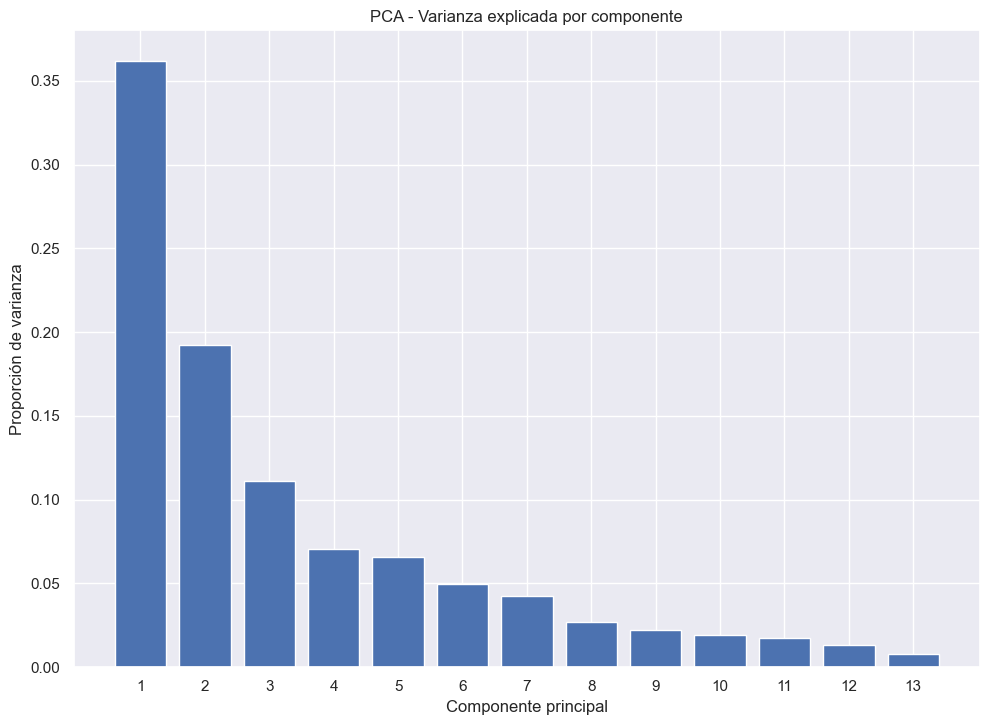

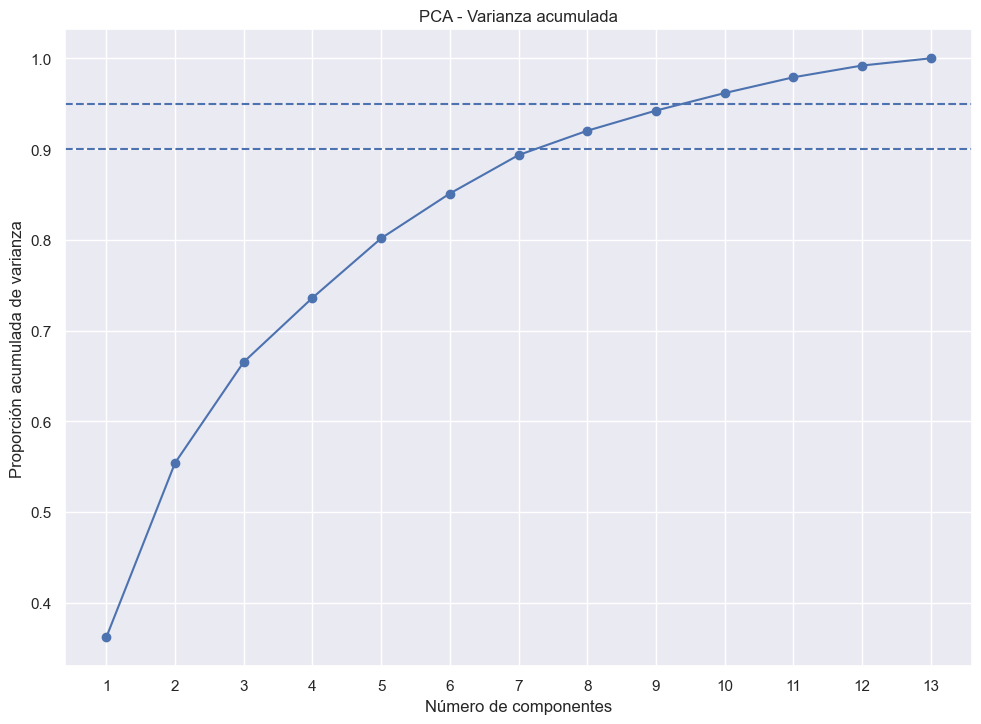

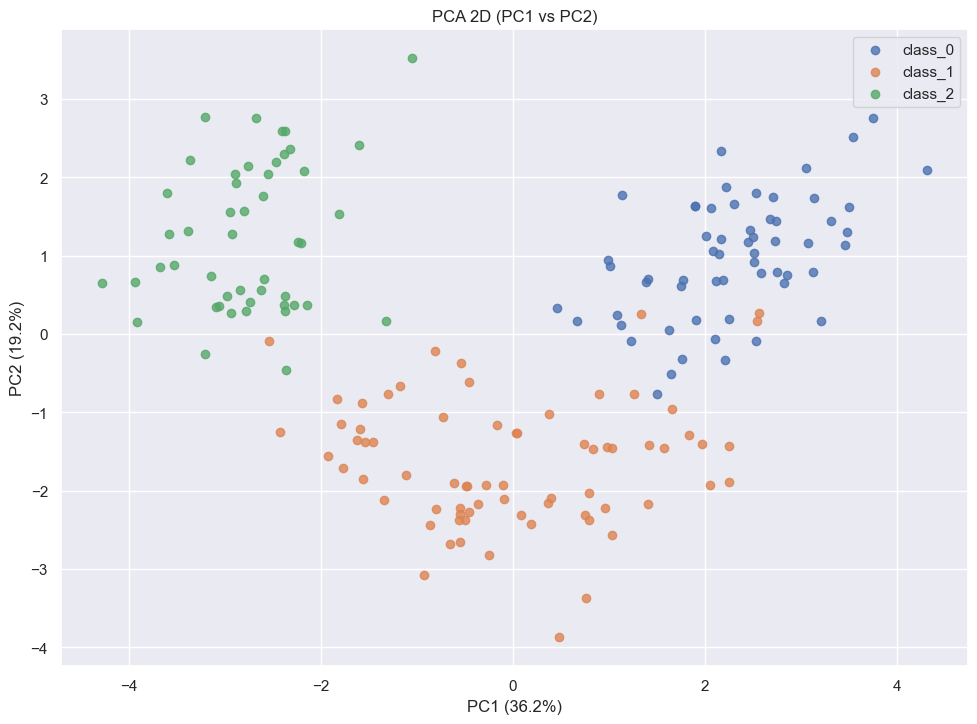

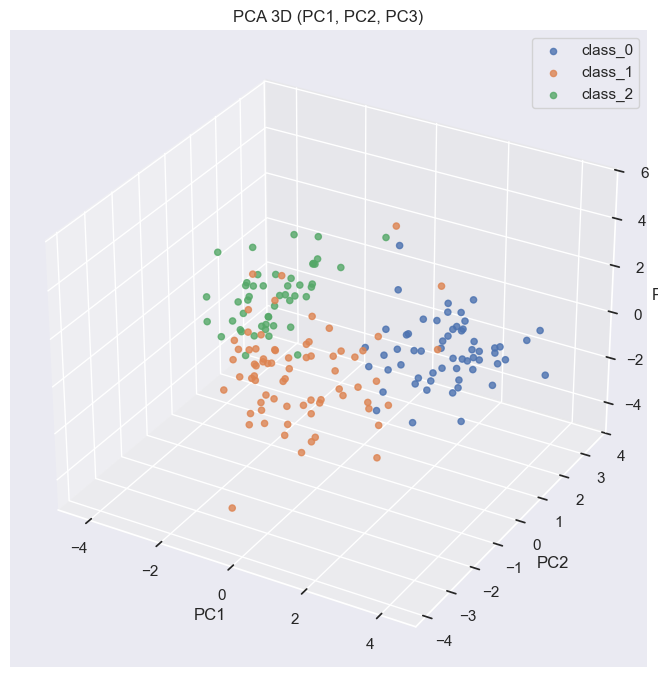

In [23]:
X = wine.drop(columns=[target]).copy()
y = wine[target].copy()

# -----------------------------------------------------------------------------
# 2) Estandarización
# -----------------------------------------------------------------------------
scaler = StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

# -----------------------------------------------------------------------------
# 3) PCA (n_components = n_features por defecto)
# -----------------------------------------------------------------------------
pca = PCA()
pca.fit(X_std)

# Varianza explicada y acumulada
evr = pca.explained_variance_ratio_
evr_cum = np.cumsum(evr)
k90 = np.argmax(evr_cum >= 0.90) + 1
k95 = np.argmax(evr_cum >= 0.95) + 1
print(f"Componentes para ≥90%: {k90}")
print(f"Componentes para ≥95%: {k95}")

# -----------------------------------------------------------------------------
# 4) Scores (proyección) y Loadings (cargas)
# -----------------------------------------------------------------------------
pc_labels = [f"PC{i}" for i in range(1, X_std.shape[1] + 1)]

scores = pd.DataFrame(pca.transform(X_std), columns=pc_labels, index=X.index)
scores["class_id"] = y
scores["class_name"] = scores["class_id"].map(dict(enumerate(dataset.target_names)))
print("\nScores (primeras filas):")
print(scores.head())

loadings = pd.DataFrame(pca.components_.T, index=X.columns, columns=pc_labels)
print("\nLoadings (primeras filas):")
print(loadings.iloc[:5, :5])

# -----------------------------------------------------------------------------
# 5) Gráficos PCA
# -----------------------------------------------------------------------------

# (a) Varianza explicada por componente
plt.figure()
plt.bar(range(1, len(evr) + 1), evr)
plt.title("PCA - Varianza explicada por componente")
plt.xlabel("Componente principal")
plt.ylabel("Proporción de varianza")
plt.xticks(range(1, len(evr) + 1))
plt.show()

# (b) Varianza acumulada
plt.figure()
plt.plot(range(1, len(evr) + 1), evr_cum, marker="o")
plt.axhline(0.90, linestyle="--")
plt.axhline(0.95, linestyle="--")
plt.title("PCA - Varianza acumulada")
plt.xlabel("Número de componentes")
plt.ylabel("Proporción acumulada de varianza")
plt.xticks(range(1, len(evr) + 1))
plt.show()

# (c) Dispersión 2D: PC1 vs PC2
plt.figure()
for cid, cname in enumerate(dataset.target_names):
    m = scores["class_id"] == cid
    plt.scatter(scores.loc[m, "PC1"], scores.loc[m, "PC2"], label=cname, alpha=0.8)
plt.title("PCA 2D (PC1 vs PC2)")
plt.xlabel(f"PC1 ({evr[0]:.1%})")
plt.ylabel(f"PC2 ({evr[1]:.1%})")
plt.legend()
plt.show()

# (d) Dispersión 3D: PC1, PC2, PC3
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
for cid, cname in enumerate(dataset.target_names):
    m = scores["class_id"] == cid
    ax.scatter(scores.loc[m, "PC1"], scores.loc[m, "PC2"], scores.loc[m, "PC3"], label=cname, alpha=0.8)
ax.set_title("PCA 3D (PC1, PC2, PC3)")
ax.set_xlabel("PC1"); ax.set_ylabel("PC2"); ax.set_zlabel("PC3")
ax.legend()
plt.show()

En el PC1 (Eje donde los datos poseen más variabilidad), los componentes mas influyentes son malic_acid y alcalinity_of_ash. En  PC2 domina el alcohol, ash, magnesium y malic_acid. PC3: ash y alcalinity_of_ash. PC4: malic_acid. PC5: magnesium.



### 2. **Análisis detallado con t-SNE**

* Aplicar **t-SNE** para reducir los datos a 2 dimensiones, probando diferentes configuraciones de hiperparámetros como *perplexity* y *learning rate*.
* Comparar las distintas visualizaciones obtenidas y discutir cómo los hiperparámetros afectan la estructura de los clústeres.
* Analizar si las **tres clases de vinos** forman agrupaciones definidas y si t-SNE logra capturar relaciones no lineales que PCA no refleja.



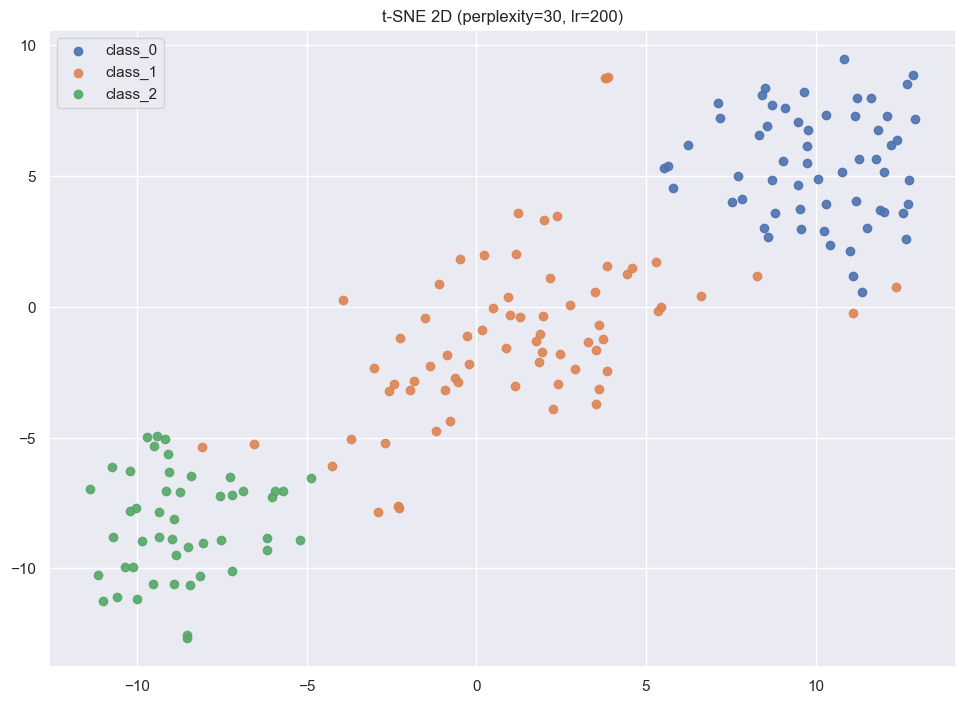

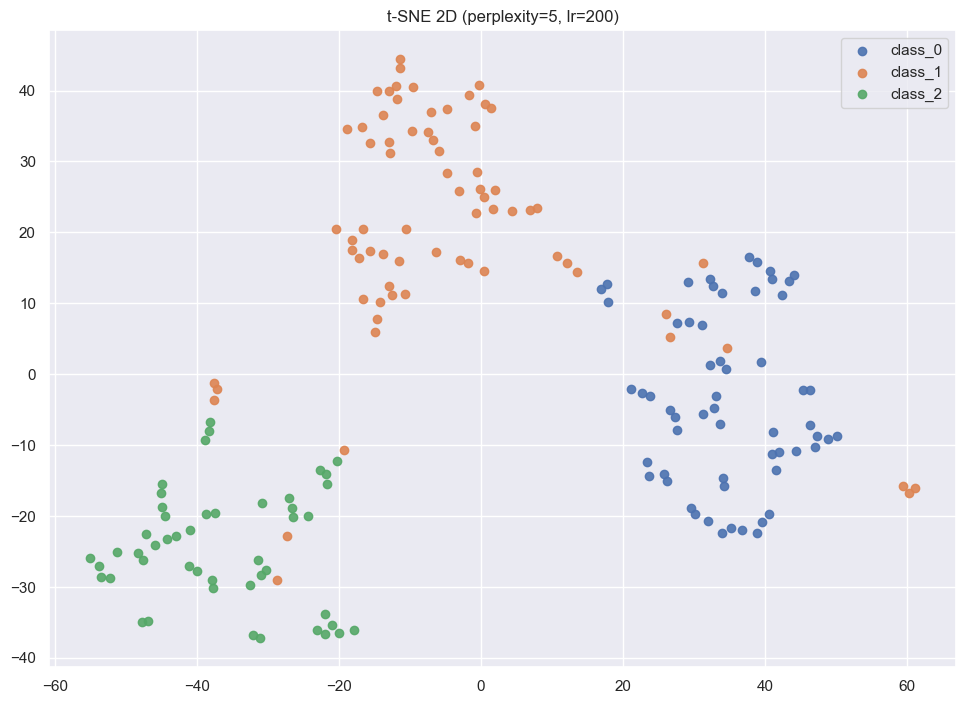

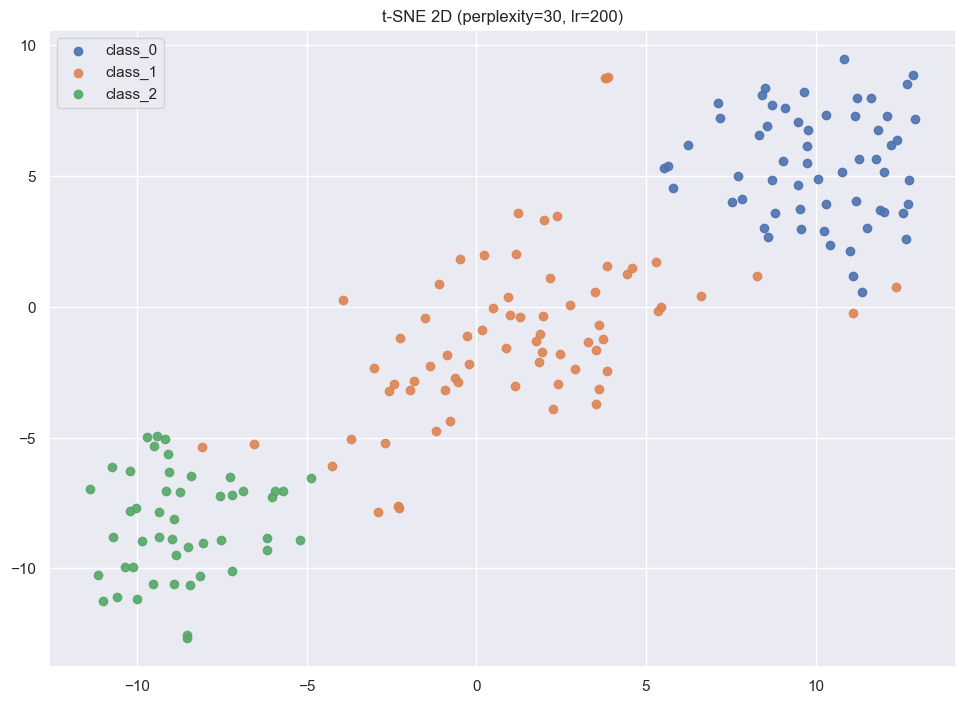

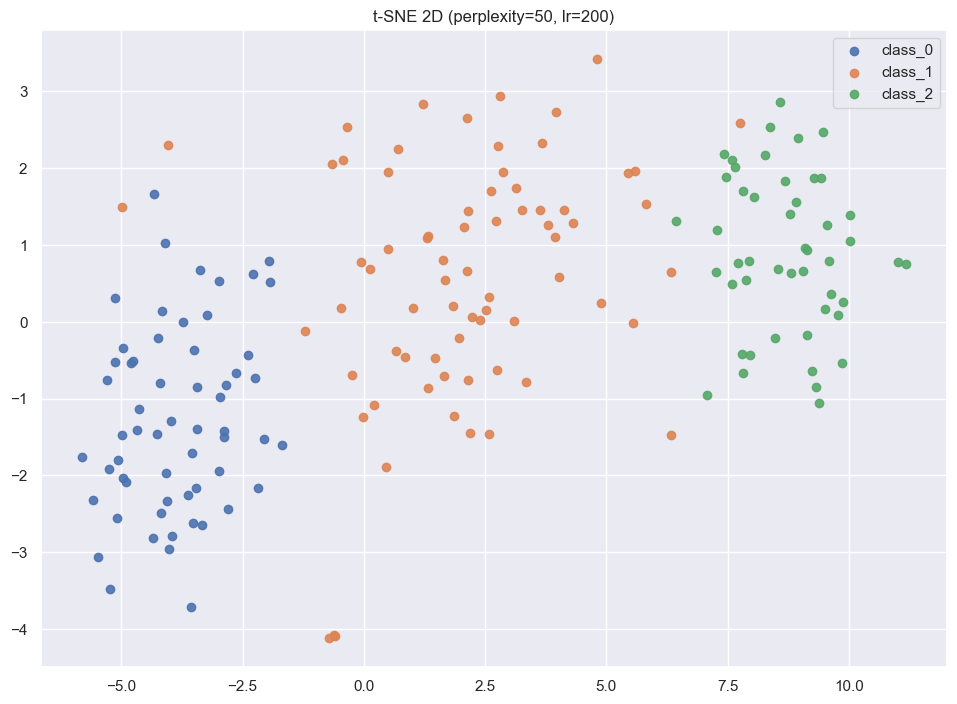

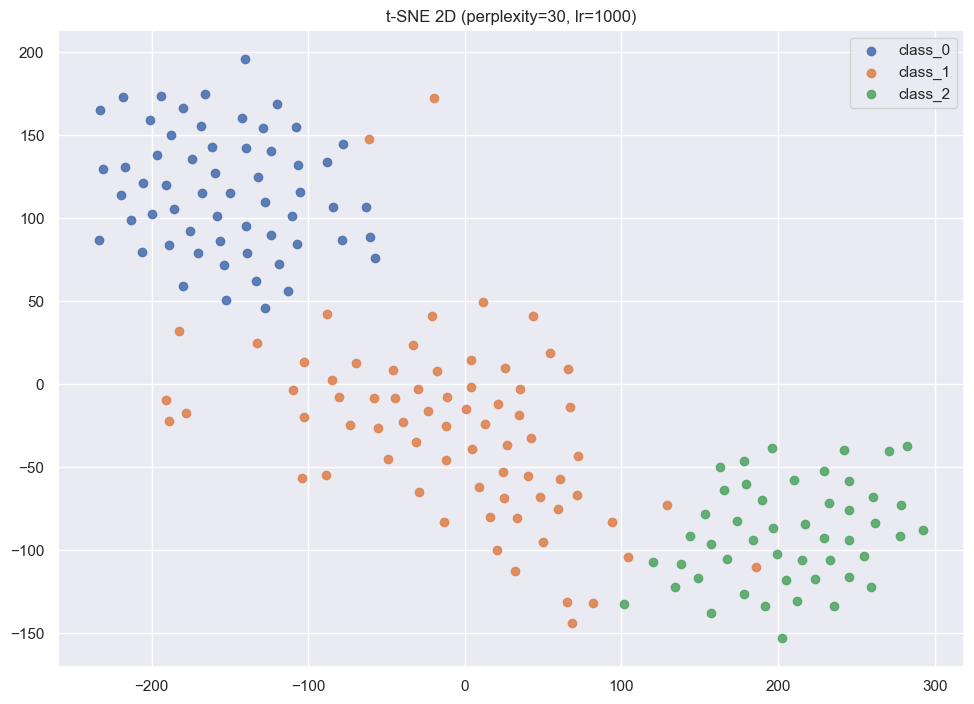

In [24]:
Z = TSNE(n_components=2, random_state=0, init='pca', perplexity=30, learning_rate=200).fit_transform(X_std)
plt.figure()
for cid in np.unique(y):
    m = (y == cid)
    plt.scatter(Z[m, 0], Z[m, 1], label=f"class_{cid}", alpha=0.9)
plt.title("t-SNE 2D (perplexity=30, lr=200)")
plt.legend(); plt.show()

# 2) Barrido mínimo de hiperparámetros (cumple “probar distintas configuraciones”)
for p, lr in [(5,200), (30,200), (50,200), (30,1000)]:
    Z = TSNE(n_components=2, perplexity=p, learning_rate=lr, init='pca', random_state=0).fit_transform(X_std)
    plt.figure()
    for cid in np.unique(y):
        m = (y == cid)
        plt.scatter(Z[m, 0], Z[m, 1], label=f"class_{cid}", alpha=0.9)
    plt.title(f"t-SNE 2D (perplexity={p}, lr={lr})")
    plt.legend(); plt.show()



### 3. **Comparación entre PCA y t-SNE**

* Contrastar las visualizaciones y discutir las **ventajas y limitaciones** de cada técnica:

  * PCA como método **lineal** para interpretar varianza y relaciones globales.
  * t-SNE como método **no lineal** que preserva relaciones locales y vecindades.
* Evaluar en qué escenarios prácticos sería más recomendable usar PCA (interpretabilidad, reducción previa para modelos) o t-SNE (exploración y visualización de clústeres).
* Reflexionar sobre la **importancia de la reducción de dimensionalidad** en datasets de alta dimensión como Wine, destacando su utilidad para:

  * Visualizar patrones ocultos en los datos.
  * Reducir complejidad y ruido antes de aplicar algoritmos de aprendizaje automático.
  * Facilitar la interpretación y comunicación de resultados.



Dimensión tras PCA previo (≈95% var): 10


C:\Users\William\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
C:\Users\William\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
C:\Users\William\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
C:\Users\William\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
C:\Users\William\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_it

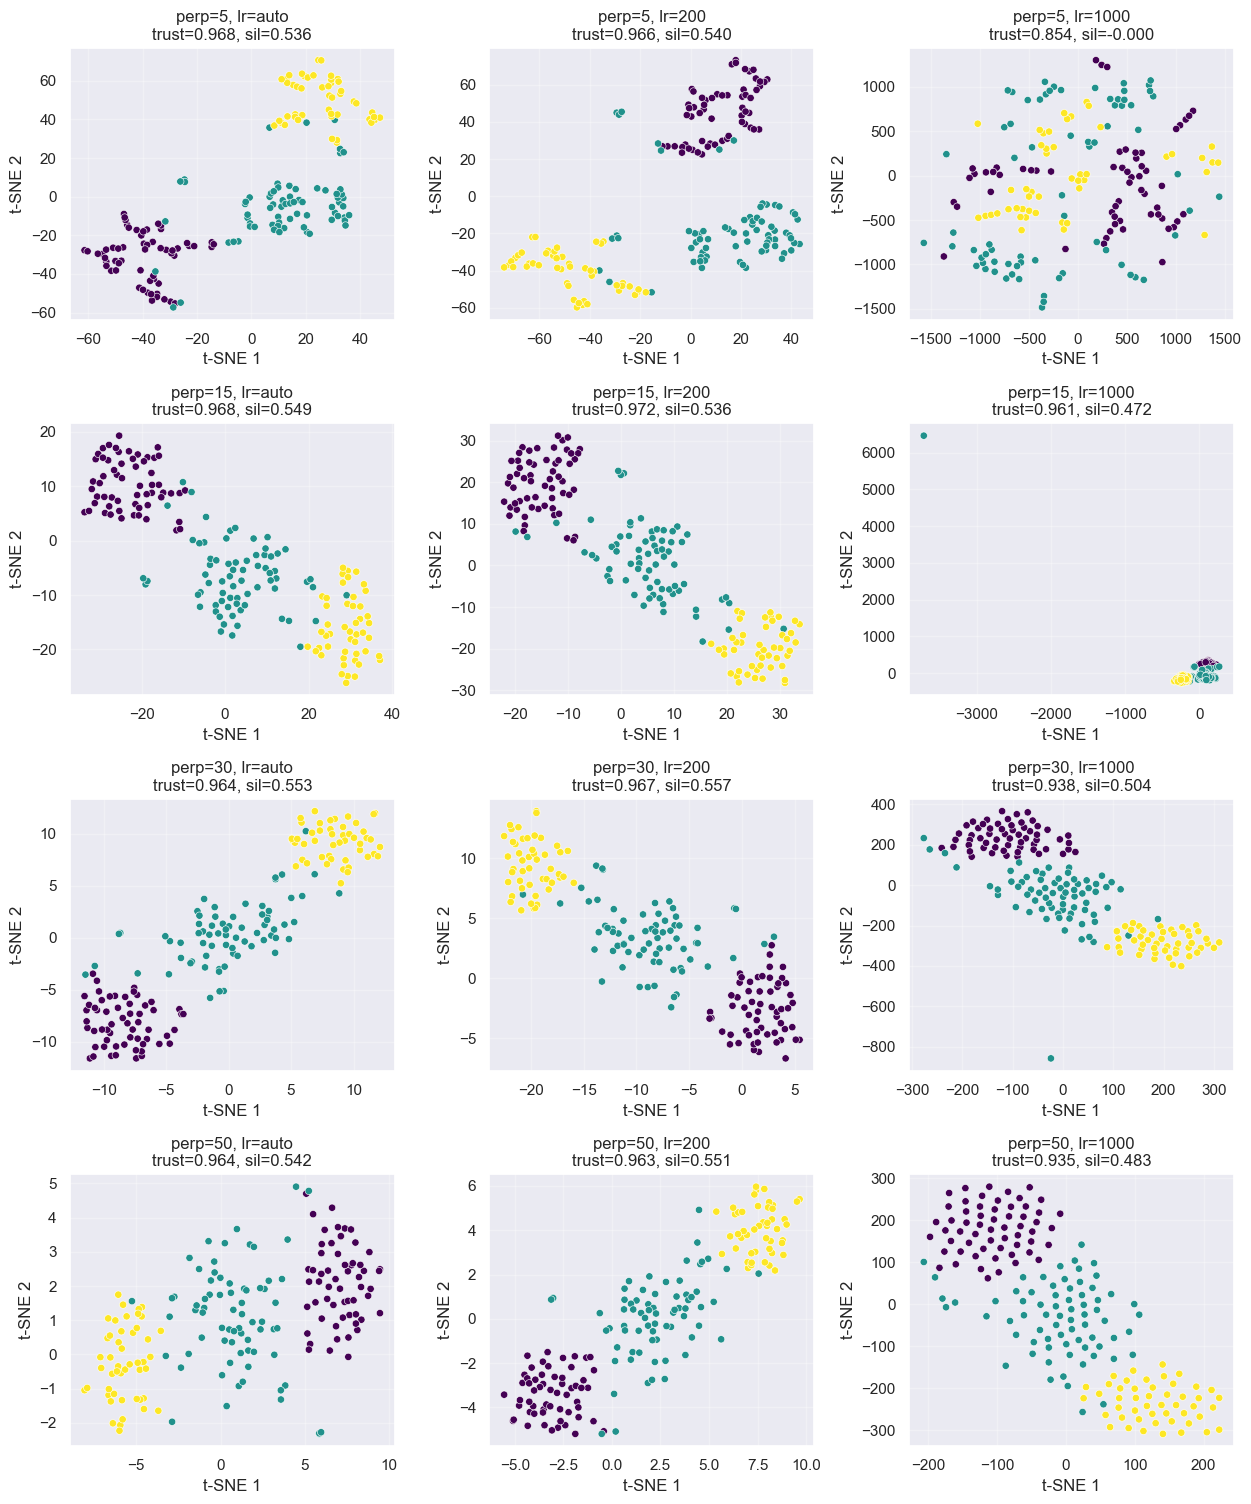

Mejor configuración ≈ perp=15, lr=200, trust=0.972, sil=0.536


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, trustworthiness
from sklearn.metrics import silhouette_score

# ========= 1) Datos, escalado y PCA previo (des-ruido) =========
X = wine.drop(columns=[target]).values
y = wine[target].values
n = X.shape[0]

scaler = StandardScaler()
Xz = scaler.fit_transform(X)

# PCA previo para reducir colinealidad/ruido (conservar ~95% var)
pca_pre = PCA(n_components=0.95, svd_solver='full', random_state=42)
X_pca = pca_pre.fit_transform(Xz)
print(f"Dimensión tras PCA previo (≈95% var): {X_pca.shape[1]}")

# ========= 2) Barrido de hiperparámetros =========
perplexities = [5, 15, 30, 50]          # válido: < n (178)
lrs = ['auto', 200, 1000]               # 'auto' ≈ max(n/12, 200)
n_iter = 2000                           # suficiente para converger
early_exag = 12                         # puedes probar 24 para mayor separación

results = []   # guardará dicts con embedding, métricas, etc.

for perp in perplexities:
    for lr in lrs:
        tsne = TSNE(
            n_components=2,
            perplexity=perp,
            learning_rate=lr,
            n_iter=n_iter,
            early_exaggeration=early_exag,
            init='pca',             # estabilidad / mejor arranque
            random_state=42,
            metric='euclidean',
            verbose=0
        )
        Z = tsne.fit_transform(X_pca)

        # Métrica no supervisada de preservación local
        trust = trustworthiness(X_pca, Z, n_neighbors=5)

        # Separación por clases (usando etiquetas reales SOLO para evaluar)
        sil = silhouette_score(Z, y, metric='euclidean')

        results.append({
            "perplexity": perp,
            "lr": lr,
            "Z": Z,
            "trustworthiness": trust,
            "silhouette_wrt_labels": sil
        })

# ========= 3) Visualización comparativa en rejilla =========
cols = len(lrs)
rows = len(perplexities)
fig, axes = plt.subplots(rows, cols, figsize=(4.2*cols, 3.8*rows), squeeze=False)

for i, perp in enumerate(perplexities):
    for j, lr in enumerate(lrs):
        r = next(r for r in results if r["perplexity"]==perp and r["lr"]==lr)
        ax = axes[i, j]
        emb = r["Z"]
        sns.scatterplot(x=emb[:,0], y=emb[:,1], hue=y, palette='viridis', s=28, ax=ax, legend=False)
        ax.set_xlabel("t-SNE 1"); ax.set_ylabel("t-SNE 2")
        ax.set_title(f"perp={perp}, lr={lr}\ntrust={r['trustworthiness']:.3f}, sil={r['silhouette_wrt_labels']:.3f}")
        ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ========= 4) Opción: escoger el “mejor” segun trust/sil =========
best = max(results, key=lambda d: (d["trustworthiness"], d["silhouette_wrt_labels"]))
print(f"Mejor configuración ≈ perp={best['perplexity']}, lr={best['lr']}, "
      f"trust={best['trustworthiness']:.3f}, sil={best['silhouette_wrt_labels']:.3f}")


Componentes para ≥90%: 8
Componentes para ≥95%: 10


,PC,Varianza explicada,Varianza acumulada
0,PC1,0.361988,0.361988
1,PC2,0.192075,0.554063
2,PC3,0.111236,0.665300
3,PC4,0.070690,0.735990
4,PC5,0.065633,0.801623
5,PC6,0.049358,0.850981
6,PC7,0.042387,0.893368
7,PC8,0.026807,0.920175
8,PC9,0.022222,0.942397
9,PC10,0.019300,0.961697


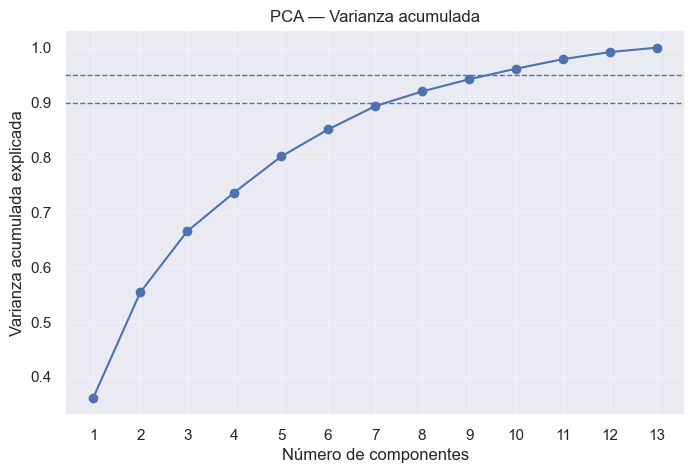

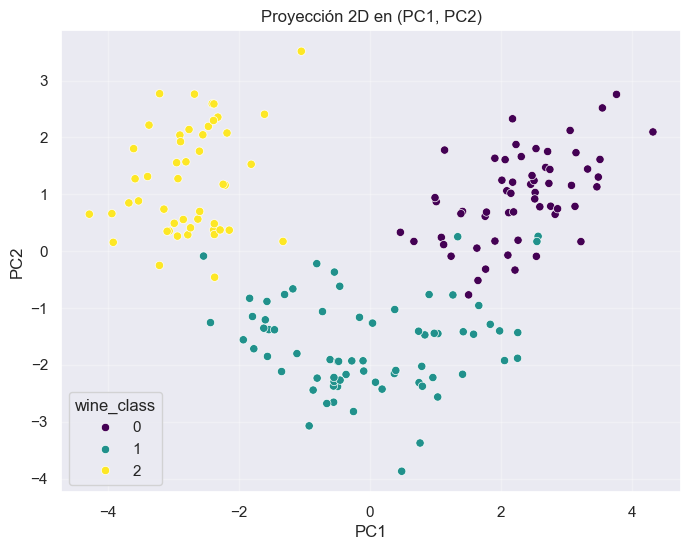

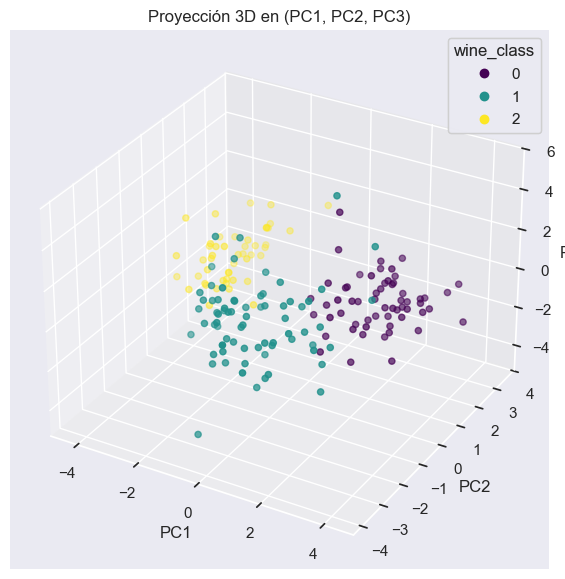

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
alcohol,0.144329,0.483652,-0.207383,-0.017856,-0.265664,0.213539,-0.056396,0.396139,-0.508619,0.211605,-0.225917,-0.266286,0.014970
malic_acid,-0.245188,0.224931,0.089013,0.536890,0.035214,0.536814,0.420524,0.065827,0.075283,-0.309080,0.076486,0.121696,0.025964
ash,-0.002051,0.316069,0.626224,-0.214176,-0.143025,0.154475,-0.149171,-0.170260,0.307694,-0.027125,-0.498691,-0.049622,-0.141218
alcalinity_of_ash,-0.239320,-0.010591,0.612080,0.060859,0.066103,-0.100825,-0.286969,0.427970,-0.200449,0.052799,0.479314,-0.055743,0.091683
magnesium,0.141992,0.299634,0.130757,-0.351797,0.727049,0.038144,0.322883,-0.156361,-0.271403,0.067870,0.071289,0.062220,0.056774



Correlation loadings (correlación variable–PC):


,PC1,PC2,PC3,PC4,PC5
alcohol,0.313977,0.766413,-0.250087,-0.017166,-0.246087
malic_acid,-0.533385,0.356434,0.107342,0.516132,0.032619
ash,-0.004462,0.500855,0.755176,-0.205895,-0.132486
alcalinity_of_ash,-0.520622,-0.016782,0.738120,0.058506,0.061232
magnesium,0.308892,0.474812,0.157682,-0.338195,0.673472
total_phenols,0.858552,0.103064,0.176280,0.190410,-0.138315
flavanoids,0.920058,-0.005324,0.181710,0.146406,-0.100992
nonflavanoid_phenols,-0.649434,0.045605,0.205450,-0.195440,-0.463806
proanthocyanins,0.681840,0.062279,0.180230,0.383627,0.126775
color_intensity,-0.192778,0.839852,-0.165580,0.063377,-0.070804



Top 5 variables que más influyen en PC1:


flavanoids                      0.920058
total_phenols                   0.858552
od280/od315_of_diluted_wines    0.818321
proanthocyanins                 0.681840
nonflavanoid_phenols            0.649434
Name: PC1, dtype: float64


Top 5 variables que más influyen en PC2:


color_intensity    0.839852
alcohol            0.766413
proline            0.578239
ash                0.500855
magnesium          0.474812
Name: PC2, dtype: float64


Top 5 variables que más influyen en PC3:


ash                             0.755176
alcalinity_of_ash               0.738120
alcohol                         0.250087
nonflavanoid_phenols            0.205450
od280/od315_of_diluted_wines    0.200188
Name: PC3, dtype: float64

,PC1,PC2,PC3,PC4,PC5,wine_class
0,3.316751,1.443463,-0.165739,-0.215631,0.693043,0
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655,0
2,2.516740,1.031151,0.982819,0.724902,-0.251033,0
3,3.757066,2.756372,-0.176192,0.567983,-0.311842,0
4,1.008908,0.869831,2.026688,-0.409766,0.298458,0


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

# ====== Datos ======
X = wine.drop(columns=[target]).values
y = wine[target].values
feature_names = wine.drop(columns=[target]).columns
class_names = dataset.target_names  # ['class_0','class_1','class_2'] reales del Wine

# ====== 1) Escalado (imprescindible en PCA) ======
scaler = StandardScaler()
Xz = scaler.fit_transform(X)

# ====== 2) PCA (ajustar una sola vez) ======
pca = PCA()       # sin n_components: calcula todos
pca.fit(Xz)

# Varianza explicada y acumulada
expl_var = pca.explained_variance_ratio_
cum_var = np.cumsum(expl_var)

n_components_90 = np.argmax(cum_var >= 0.90) + 1
n_components_95 = np.argmax(cum_var >= 0.95) + 1
print(f"Componentes para ≥90%: {n_components_90}")
print(f"Componentes para ≥95%: {n_components_95}")

# Tabla varianza por componente
var_table = pd.DataFrame({
    "PC": [f"PC{i+1}" for i in range(len(expl_var))],
    "Varianza explicada": expl_var,
    "Varianza acumulada": cum_var
})
display(var_table)

# Gráfico de varianza acumulada (scree cumulativo)
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o')
plt.axhline(0.90, linestyle='--', linewidth=1)
plt.axhline(0.95, linestyle='--', linewidth=1)
plt.xticks(range(1, len(cum_var)+1))
plt.ylabel('Varianza acumulada explicada')
plt.xlabel('Número de componentes')
plt.title('PCA — Varianza acumulada')
plt.grid(True, alpha=0.3)
plt.show()

# ====== 3) Proyecciones coherentes (usar transform, NO volver a fit) ======
Z = pca.transform(Xz)  # todas las PCs

# 2D
proj2 = pd.DataFrame(Z[:, :2], columns=['PC1','PC2'])
proj2[target] = y
plt.figure(figsize=(8,6))
sns.scatterplot(data=proj2, x='PC1', y='PC2', hue=target, palette='viridis')
plt.title('Proyección 2D en (PC1, PC2)')
plt.grid(True, alpha=0.3)
plt.show()

# 3D
from mpl_toolkits.mplot3d import Axes3D  # solo para activar el backend 3D en algunas versiones
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(Z[:,0], Z[:,1], Z[:,2], c=y, cmap='viridis')
ax.set_xlabel('PC1'); ax.set_ylabel('PC2'); ax.set_zlabel('PC3')
ax.set_title('Proyección 3D en (PC1, PC2, PC3)')
legend1 = ax.legend(*p.legend_elements(), title=target)
ax.add_artist(legend1)
plt.show()

# ====== 4) Loadings ======
# a) "Coeficientes" (eigenvectores): matriz variables x componentes
components = pd.DataFrame(pca.components_.T,
                          index=feature_names,
                          columns=[f"PC{i+1}" for i in range(pca.n_components_)])
display(components.head())

# b) "Correlation loadings" (recomendado para interpretar):
#    Con X estandarizado, correlation loadings = eigenvectores * sqrt(eigenval)
#    (equivale a correl(variable, PC))
eigvals = pca.explained_variance_  # eigenvalues
corr_loadings = components.iloc[:, :].to_numpy() * np.sqrt(eigvals)
corr_loadings = pd.DataFrame(corr_loadings,
                             index=feature_names,
                             columns=[f"PC{i+1}" for i in range(pca.n_components_)])
print("\nCorrelation loadings (correlación variable–PC):")
display(corr_loadings.iloc[:, :5])  # primeras 5 PCs

# Top variables por componente (según |correlación|)
def top_vars(load_df, pc, k=5):
    s = load_df[pc].abs().sort_values(ascending=False)
    return s.head(k)

for j in range(3):  # PC1..PC3
    pc = f"PC{j+1}"
    print(f"\nTop 5 variables que más influyen en {pc}:")
    display(top_vars(corr_loadings, pc, k=5))

# ====== 5) Tabla de proyecciones (observaciones en primeras PCs) ======
projections_table = pd.DataFrame(Z[:, :5], columns=[f"PC{i+1}" for i in range(5)])
projections_table[target] = y
display(projections_table.head())


PCA es lineal ym maximiza varianza global: permite cuantificar varianza explicada, leer loadings para saber qué variables dominan cada componente y aplicar la misma proyección a datos nuevos, por eso es ideal para interpretar, reducir colinealidad y preparar modelos; t-SNE es no lineal y preserva vecindades locales: no tiene loadings ni varianza explicada y depende de perplexity/learning rate, pero suele mostrar clústeres 2D más compactos cuando hay estructura no lineal, útil para exploración y comunicación visual; en Wine, PCA 2D puede dejar algo de solape entre dos clases, mientras que t-SNE 2D con parámetros razonables suele separar mejor las tres variedades si existen relaciones no lineales; en resumen usa PCA cuando necesites interpretabilidad y reducción previa reproducible, usa t-SNE cuando quieras visualizar clústeres y vecindades, y la reducción de dimensionalidad importa porque revela patrones, baja complejidad/ruido y facilita tanto el aprendizaje automático como la comunicación de resultados.


#### 3.1. Panorama general (qué hace cada técnica)

| Aspecto | PCA | t-SNE |
|---|---|---|
| Tipo | Lineal | No lineal |
| Objetivo | Maximizar varianza global en ejes ortogonales | Preservar vecindarios locales en baja dimensión |
| Qué preserva | Estructura global (direcciones de mayor variabilidad) | Proximidad local (vecinos permanecen juntos) |
| Interpretabilidad | Alta (loadings: peso de cada variable en cada PC) | Baja (ejes sin significado físico directo) |
| Geometría global | Fiable (distancias/ángulos entre PCs) | No fiable (distancias/áreas entre clústeres no comparables) |
| Nuevos datos | `fit`/`transform` estable | No hay `transform` estándar (embedding no paramétrico) |
| Hiperparámetros | Pocos (n.º de componentes) | Varios (perplexity, learning rate, early exaggeration) |
| Costo | Rápido, escalable | Más costoso; sensible a hiperparámetros y aleatoriedad |

---

#### 3.2. Ventajas y limitaciones

PCA — Ventajas
- Ejes interpretables mediante *loadings* (explican qué variables dominan cada PC).
- Permite cuantificar información retenida (varianza explicada y acumulada).
- Determinístico, rápido y aplicable a nuevos datos con `.transform`.
- Útil para descorrelacionar y reducir ruido previo a modelado.

PCA — Limitaciones
- Solo captura relaciones lineales.
- En 2D, la separación depende de cuánta varianza concentran PC1–PC2.
- Requiere estandarización previa si las escalas difieren.

t-SNE — Ventajas
- Descubre clústeres compactos cuando hay estructuras no lineales.
- Suele revelar patrones finos que pueden quedar solapados en PCA 2D.

t-SNE — Limitaciones
- Ejes no interpretables; no hay *loadings*.
- Geometría global (tamaños/espacios entre clústeres) no es confiable.
- Hiperparámetros influyen mucho; es estocástico (conviene fijar semilla).
- No es un extractor de características estable para nuevos datos.

---



#### 3.3. Aplicación al dataset Wine (13D, 3 clases)

- PCA suele mostrar separación razonable ya en (PC1, PC2) y permite explicar qué compuestos dominan cada dirección (a partir de los loadings o correlation loadings).
- t-SNE típicamente produce islotes bien definidos por clase, capturando vecindarios que en PCA 2D pueden quedar parcialmente solapados.  
  Es excelente para comunicar la estructura, pero no para inferir “qué variable causó” la separación.

---

#### 3.4. Importancia de la reducción de dimensionalidad (en Wine y en alta dimensión)

- Visualizar patrones ocultos: pasar de 13D a 2D/3D permite ver la estructura de clases.
- Reducir complejidad y ruido: mejora estabilidad y eficiencia de algoritmos posteriores.
- Facilitar interpretación y comunicación: PCA aporta evidencia explicable (loadings, varianza); t-SNE brinda intuición visual clara de clústeres.

---

#### 3.5. Conclusión práctica

- Para un pipeline analítico y de modelado: PCA (estandarizar → elegir \(k\) por varianza → usar PCs como features).  
- Para visualización exploratoria y discusión de clústeres: t-SNE (idealmente tras PCA), reportando métricas de preservación local y fijando semilla.  
- En Wine, ambos son complementarios: PCA responde qué variables separan; t-SNE muestra cómo se agrupan localmente las tres variedades.
